In [1]:
from unityagents import UnityEnvironment
from importlib import reload
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import dqn_runner

env = UnityEnvironment(file_name="Banana_Linux_NoVis/Banana.x86_64")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

%matplotlib inline

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.84
Time:  0.8020992070014472
env Time:  0.44078789609193336
30000
Episode 200	Average Score: 3.65
Time:  0.8448370089972741
env Time:  0.4525597070460208
60000
Episode 300	Average Score: 7.14
Time:  0.8540348730020924
env Time:  0.4444798139593331
90000
Episode 400	Average Score: 10.08
Time:  0.8785088439981337
env Time:  0.4450793780561071
120000
Episode 472	Average Score: 13.00
Environment solved in 372 episodes!	Average Score: 13.00


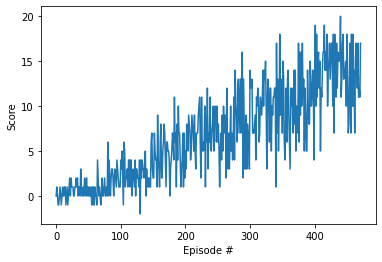

In [8]:
import dqn_agent
reload(dqn_agent)
reload(dqn_runner)
Agent = dqn_agent.Agent
agent = Agent(state_size=37, action_size=4, seed=0)

scores = dqn_runner.dqn(env, agent, n_episodes=1000, brain_name=brain_name)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 0.54
Time:  1.1819711810021545
env Time:  0.6737496600399027
30000
Episode 200	Average Score: 3.39
Time:  1.2541237640034524
env Time:  0.7022998629836366
60000
Episode 300	Average Score: 7.30
Time:  1.1269857450024574
env Time:  0.5948109329910949
90000
Episode 400	Average Score: 10.07
Time:  0.9083204499984276
env Time:  0.45413436903618276
120000
Episode 500	Average Score: 12.70
Time:  1.2075243860017508
env Time:  0.6472200940261246
150000
Episode 508	Average Score: 13.02
Environment solved in 408 episodes!	Average Score: 13.02


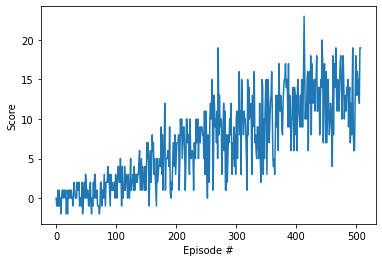

In [13]:
import double_dqn_agent
reload(double_dqn_agent)
reload(dqn_runner)
Agent = double_dqn_agent.Agent
agent = Agent(state_size=37, action_size=4, seed=0)

scores = dqn_runner.dqn(env, agent, n_episodes=1000, brain_name=brain_name)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 0.38
Time:  1.1023493739994592
env Time:  0.556874772075389
30000
Episode 200	Average Score: 3.21
Time:  1.179468310001539
env Time:  0.5956265010026982
60000
Episode 300	Average Score: 8.39
Time:  1.1670654120025574
env Time:  0.5584816350892652
90000
Episode 400	Average Score: 11.88
Time:  1.1661976459945436
env Time:  0.560190031901584
120000
Episode 423	Average Score: 13.00
Environment solved in 323 episodes!	Average Score: 13.00


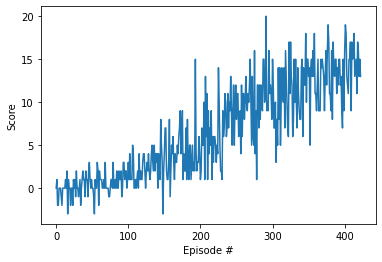

In [14]:
import dueling_model
import double_dqn_agent
reload(double_dqn_agent)
reload(dueling_model)
reload(dqn_runner)
Agent = dqn_agent.Agent
agent = Agent(state_size=37, action_size=4, seed=0, qNetwork=dueling_model.QNetwork)

scores = dqn_runner.dqn(env, agent, n_episodes=1000, brain_name=brain_name)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

<class 'model.QNetwork'>
True
<class 'model.QNetwork'>
True
Episode 100	Average Score: 0.60
Time:  1.098140139998577
env Time:  0.4555972599919187
30000
Episode 200	Average Score: 3.42
Time:  1.1685727869989933
env Time:  0.49567320699134143
60000
Episode 300	Average Score: 6.99
Time:  1.1083082459990692
env Time:  0.46047828600057983
90000
Episode 400	Average Score: 10.97
Time:  1.3668469959993672
env Time:  0.6139771759626456
120000
Episode 500	Average Score: 12.39
Time:  1.0952641220028454
env Time:  0.44497744802356465
150000
Episode 551	Average Score: 13.02
Environment solved in 451 episodes!	Average Score: 13.02


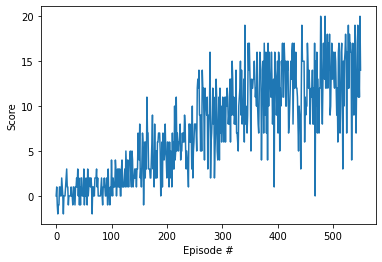

In [22]:
import per_dqn_agent
reload( per_dqn_agent)
reload(dqn_runner)
Agent = per_dqn_agent.Agent
agent = Agent(state_size=37, action_size=4, seed=0)

scores = dqn_runner.dqn(env, agent, n_episodes=1000, brain_name=brain_name)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 0.11
Time:  1.3705858239991358
env Time:  0.6033280669798842
30000
Episode 200	Average Score: 2.91
Time:  1.3539581670011103
env Time:  0.5807150309738063
60000
Episode 300	Average Score: 6.37
Time:  1.4276806359994225
env Time:  0.5998067570035346
90000
Episode 400	Average Score: 10.32
Time:  1.311615777998668
env Time:  0.5487936540048395
120000
Episode 500	Average Score: 12.34
Time:  1.1247562409989769
env Time:  0.4459983210763312
150000
Episode 561	Average Score: 13.04
Environment solved in 461 episodes!	Average Score: 13.04


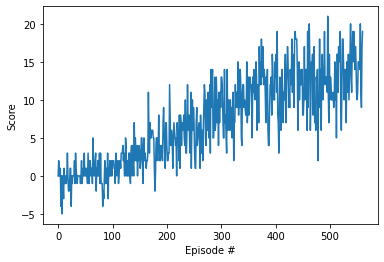

In [2]:
import double_dqn_agent
import per_dqn_agent
import model
# reload(double_dqn_agent)
# reload(per_dqn_agent)
# reload(model)

class Double_PER_Agent(double_dqn_agent.Agent, per_dqn_agent.Agent):
    pass
agent = Double_PER_Agent(state_size=37, action_size=4, seed=0)

scores = dqn_runner.dqn(env, agent, n_episodes=1000, brain_name=brain_name)
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 1.13
Time:  1.0959210279979743
env Time:  0.4307926919645979
30000
Episode 200	Average Score: 4.05
Time:  1.1481343919949722
env Time:  0.46814299597463105
60000
Episode 300	Average Score: 7.41
Time:  1.1268013329972746
env Time:  0.4506763429817511
90000
Episode 400	Average Score: 11.17
Time:  1.1440139759943122
env Time:  0.44216489503742196
120000
Episode 500	Average Score: 12.06
Time:  1.1217993839964038
env Time:  0.44094575695635285
150000
Episode 590	Average Score: 13.04
Environment solved in 490 episodes!	Average Score: 13.04


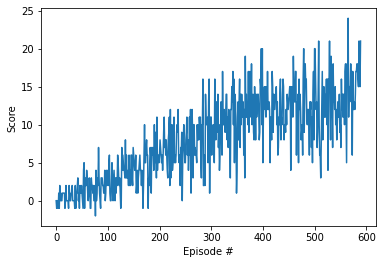

In [3]:
import double_dqn_agent
import per_dqn_agent
import dueling_model
# reload(double_dqn_agent)
# reload(per_dqn_agent)
# reload(model)

class Double_PER_Agent(double_dqn_agent.Agent, per_dqn_agent.Agent):
    pass
agent = Double_PER_Agent(state_size=37, action_size=4, seed=0, qNetwork=dueling_model.QNetwork)

scores = dqn_runner.dqn(env, agent, n_episodes=1000, brain_name=brain_name)
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()